# Part 2

Table of contents

1. Import data

2. Step 7: Aggregate the max, mean, and min variables

3. Step 8: Comparison of customer profiles 

# 1. Import Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

In [2]:
df_2 = pd.read_pickle(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Prepared Data/final_data.pkl')

In [3]:
#Check data
df_2.shape

(30964564, 36)

In [4]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,fam_status,income,_merge,region,order_flag,age_range,Income_Level,dependants_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,2019-08-01,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,2019-08-01,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,2019-08-01,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,2019-08-01,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,2019-08-01,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children


In [5]:
df_2.tail()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,date_joined,n_dependants,fam_status,income,_merge,region,order_flag,age_range,Income_Level,dependants_flag
32404843,49235,Organic Half & Half,53,16,1.8,3310701,27382,5,3,9,...,2019-11-25,3,married,37867,both,Northeast,5 or more,Older,Below Avg Income,Has children
32404844,49235,Organic Half & Half,53,16,1.8,527883,27382,6,1,12,...,2019-11-25,3,married,37867,both,Northeast,5 or more,Older,Below Avg Income,Has children
32404845,49235,Organic Half & Half,53,16,1.8,685496,27382,7,4,8,...,2019-11-25,3,married,37867,both,Northeast,5 or more,Older,Below Avg Income,Has children
32404846,49235,Organic Half & Half,53,16,1.8,1224680,27382,8,1,7,...,2019-11-25,3,married,37867,both,Northeast,5 or more,Older,Below Avg Income,Has children
32404847,49235,Organic Half & Half,53,16,1.8,2223687,27382,9,2,12,...,2019-11-25,3,married,37867,both,Northeast,5 or more,Older,Below Avg Income,Has children


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404847
Data columns (total 36 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   product_id             int64         
 1   product_name           object        
 2   aisle_id               int64         
 3   department_id          int64         
 4   prices                 float64       
 5   order_id               int64         
 6   user_id                object        
 7   order_number           int64         
 8   orders_day_of_week     int64         
 9   order_hour_of_day      int64         
 10  days_since_last_order  float64       
 11  add_to_cart_order      int64         
 12  reordered              int64         
 13  price_range_loc        object        
 14  busiest_day            object        
 15  Busiest_days           object        
 16  busiest_period_of_day  object        
 17  max_order              int64         
 18  loyalty_flag           ob

# Step 7

Aggregate the max, mean, and min variables on a customer-profile level.

In [38]:
#View the mean, min, max for the Income Level, specifically for product price to show expenditure
df_2.groupby('Income_Level').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
Income_Level                             
Above Avg Income  27.099874  1.0  99999.0
Avg Income         9.337323  1.0  99999.0
Below Avg Income   6.975343  1.0     25.0

In [39]:
#View the mean, min, max stats for the Income Level, specifically for the number of days since the customer's last order to show useage frequency
df_2.groupby('Income_Level').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                                  mean  min   max
Income_Level                                     
Above Avg Income             10.719958  0.0  30.0
Avg Income                   10.763818  0.0  30.0
Below Avg Income             11.107263  0.0  30.0

In [40]:
#View the mean, min, max for the age range, specifically for product price to show expenditure
df_2.groupby('age_range').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_range                           
Middle-Aged  11.918943  1.0  99999.0
Older        11.757768  1.0  99999.0
Young-Adult  12.133971  1.0  99999.0

In [41]:
#View the mean, min, max stats for the age range, specifically for the number of days since the customer's last order to show useage frequency
df_2.groupby('age_range').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                             mean  min   max
age_range                                   
Middle-Aged             10.813115  0.0  30.0
Older                   10.791788  0.0  30.0
Young-Adult             10.823742  0.0  30.0

# Step 8

Compare your customer profiles with regions and departments. 

In [7]:
# Import data from departments.csv
df_dep = pd.read_csv(r'/Users/marianino/Desktop/Instacart Basket Analysis/Data/Original Data/departments.csv')

In [8]:
df_dep_t = df_dep.T

In [9]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [10]:
#Reset index to remove 'department_id' from row 0
new_header = df_dep_t.iloc[0]

In [11]:
df_dep_t_new = df_dep_t[1:]

In [12]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [15]:
#Map department id to department names
department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

#Create a new column "department" based on the mapping
df_2['department'] = df_2['department_id'].map(department_mapping)

In [16]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,n_dependants,fam_status,income,_merge,region,order_flag,age_range,Income_Level,dependants_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children,snacks
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children,meat seafood
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children,meat seafood
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,1,married,49620,both,Midwest,5 or more,Older,Below Avg Income,Has children,bulk


In [17]:
#Examine values in 'department' column
df_2['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


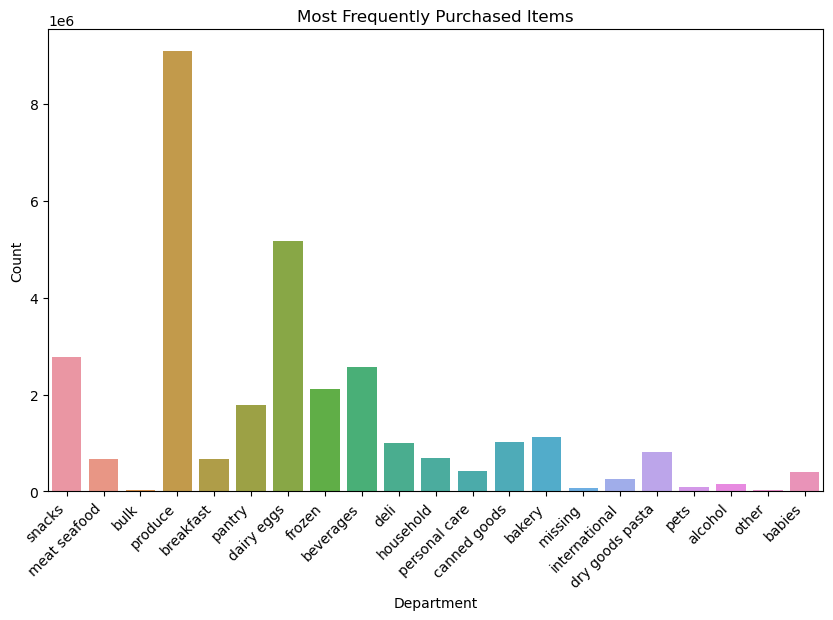

In [20]:
#Display the counts above in a bar chart
#Bar charts that show income type distributions by region

plt.figure(figsize = (10, 6))
barchart4 = sns.countplot(data = df_2, x = 'department')
plt.title('Most Frequently Purchased Items')
plt.xlabel('Department')
plt.ylabel('Count')

# plt.legend(title = 'Order Type Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.xticks(rotation = 45, ha = 'right') 
plt.show()

In [21]:
#Export the barchart
barchart4.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/most_purchased_item.png')

observation: It seems that the most frequently purchased items are: produce, dairy/eggs, snacks, and beverages. 

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

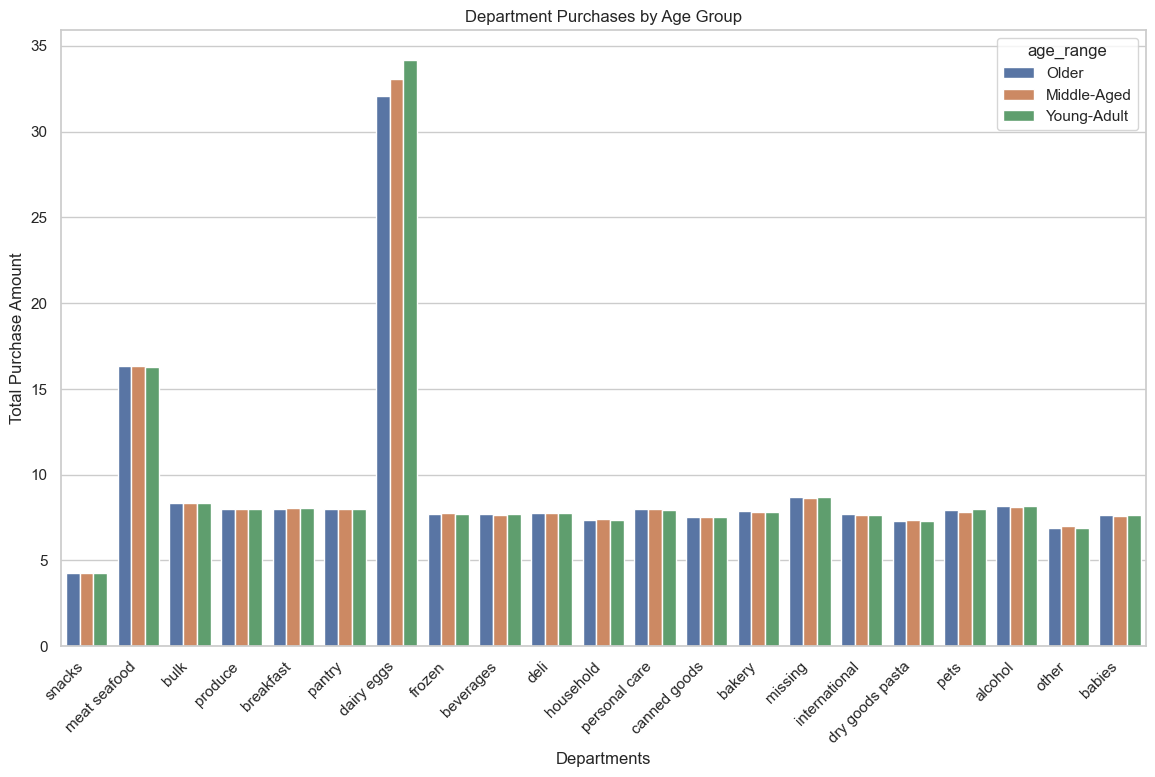

In [22]:
#Display what products people from the various regions purchase. 
#Set the style of seaborn

sns.set(style = "whitegrid")

# Create a bar chart

plt.figure(figsize=(14, 8))
barchart5 = sns.barplot(x = 'department', y = 'prices', hue = 'age_range', data = df_2, errorbar = None)

#Add labels and title
plt.title('Department Purchases by Age Group')
plt.xlabel('Departments')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation = 45, ha = 'right') 

# Show the plot
plt.show()

observation: It seems that the various age groups buy about the same amount of each item from specific departments.

In [23]:
#Export the barchart
barchart5.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/most_purchased_item_by_age.png')

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

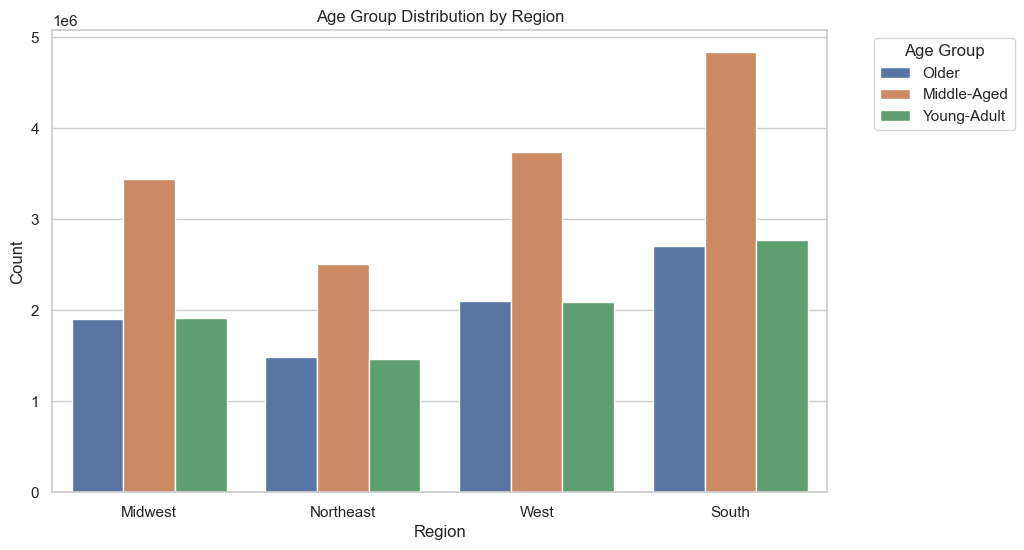

In [24]:
#Bar charts that show age group distributions by region

plt.figure(figsize = (10, 6))
barchart6 = sns.countplot(data = df_2, x = 'region', hue = 'age_range')

plt.title('Age Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Observation: It seems that the middle aged group is the largest in each region. 

In [25]:
#Export the barchart
barchart6.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/age_group_per_region.png')

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

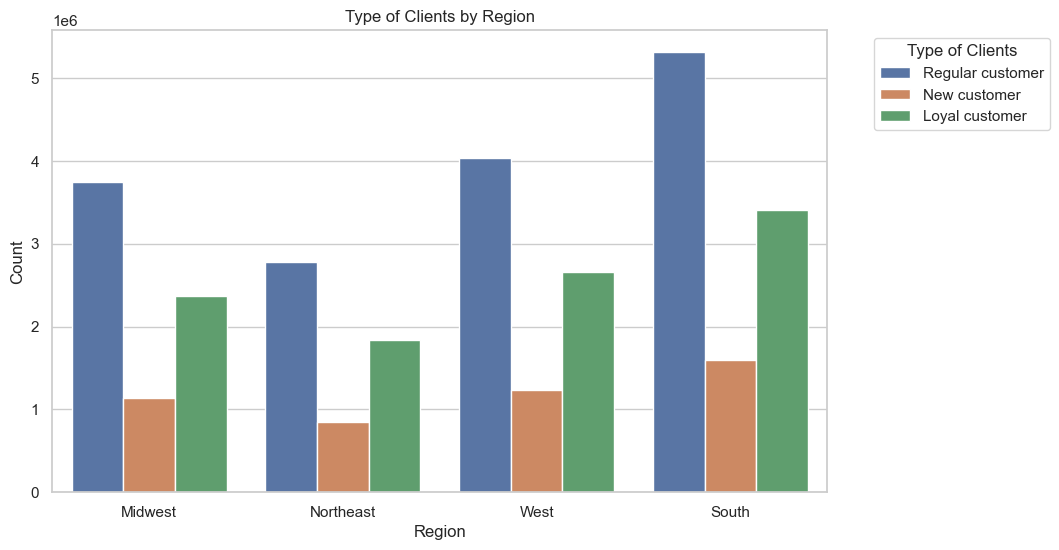

In [31]:
#Bar charts that shows frequent buyer by region

plt.figure(figsize = (10, 6))
barchart7 = sns.countplot(data = df_2, x = 'region', hue = 'loyalty_flag')
plt.title('Type of Clients by Region')
plt.xlabel('Region')

plt.ylabel('Count')
plt.legend(title = 'Type of Clients', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

Observation: It seems that the most loyal customers and the most regular customers are located in the south.

In [32]:
#Export the barchart
barchart7.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/customer_type_per_region.png')

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

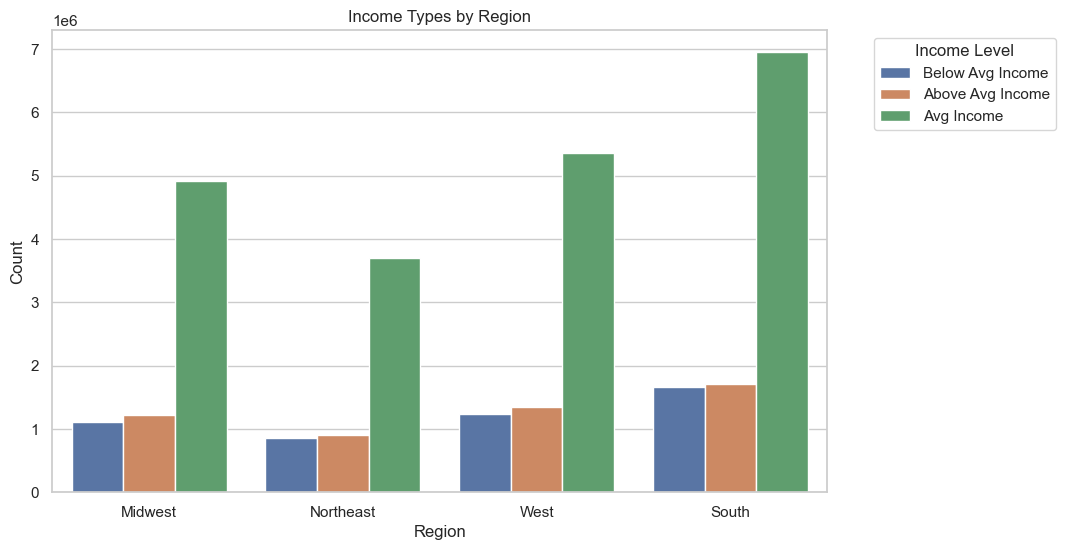

In [33]:
#Bar charts that show income type distributions by region

plt.figure(figsize = (10, 6))
barchart8 = sns.countplot(data = df_2, x = 'region', hue = 'Income_Level')
plt.title('Income Types by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title = 'Income Level', bbox_to_anchor = (1.05, 1), loc = 'upper left') 
plt.show()

Observation: Average income is the most predominant type of income across all regions.

In [34]:
#Export the barchart
barchart8.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/income_level_per_region.png')

/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marianino/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

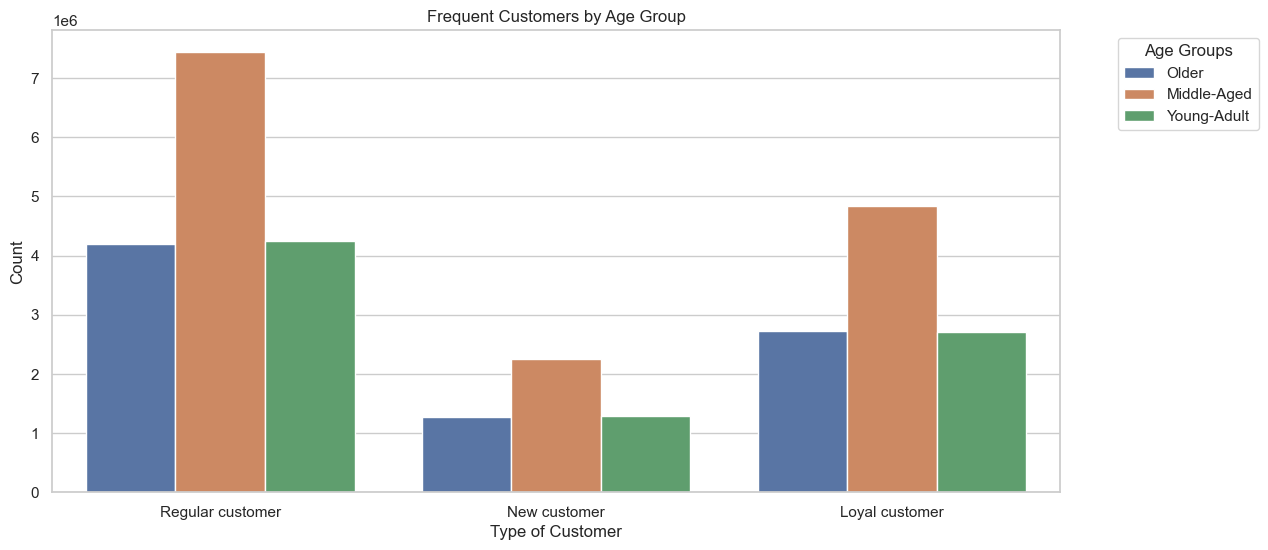

In [36]:
#Bar chart that shows frequent customers by age group
plt.figure(figsize = (13, 6))
barchart9 = sns.countplot(data = df_2, x = 'loyalty_flag', hue = 'age_range')
plt.title('Frequent Customers by Age Group')
plt.xlabel('Type of Customer')
plt.ylabel('Count')
plt.legend(title = 'Age Groups', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

Observation: The middle aged group is the most active across every type of customer

In [37]:
#Export the barchart
barchart9.figure.savefig(r'/Users/marianino/Desktop/Instacart Basket Analysis/Analysis/Visualizations/type_of_customer_per_age_group.png')